import matplotlib.pyplot as plt
# ^^^ pyforest auto-imports - don't write above this line
___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" 
alt="CLRSWY"></p>

## <p style="background-color:#FDFEFE; font-family:newtimeroman; color:#9d4f8c; font-size:100%; text-align:center; border-radius:10px 10px;">WAY TO REINVENT YOURSELF</p>

<img src=https://i.ibb.co/6gCsHd6/1200px-Pandas-logo-svg.png width="700" height="200">

## <p style="background-color:#FDFEFE; font-family:newtimeroman; color:#060108; font-size:200%; text-align:center; border-radius:10px 10px;">Data Analysis with Python</p>

## <p style="background-color:#FDFEFE; font-family:newtimeroman; color:#060108; font-size:150%; text-align:center; border-radius:10px 10px;">Session - 08</p>

## <p style="background-color:#FDFEFE; font-family:newtimeroman; color:#4d77cf; font-size:200%; text-align:center; border-radius:10px 10px;">Handling with Missing Values</p>

<a id="toc"></a>

## <p style="background-color:#9d4f8c; font-family:newtimeroman; color:#FFF9ED; font-size:175%; text-align:center; border-radius:10px 10px;">Content</p>

* [IMPORTING LIBRARIES NEEDED IN THIS NOTEBOOK](#0)
* [TYPE OF NAN VALUES](#1)
* [DETECTING MISSING VALUES](#2)
* [CONVERTING INAPPROPRIATE VALUES TO NAN VALUES](#3)    
* [MISSING VALUE HANDLING METHODS](#4)    
* [THE END OF THE SESSION - 07](#5)

## <p style="background-color:#9d4f8c; font-family:newtimeroman; color:#FFF9ED; font-size:175%; text-align:center; border-radius:10px 10px;">Importing Libraries Needed in This Notebook</p>

<a id="0"></a>
<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" 
style="color:blue; background-color:#dfa8e4" data-toggle="popover">Content</a>

Once you've installed NumPy & Pandas you can import them as a library:

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
id_no = ["P001", "P002", "P003", "P004", "P005", "P006", "P007", "P008", "P009", "P010", "P011"]
gender = ["M", "F", "M", "F", "M", "F", "M", "F", "M", "F", "M"]
status = ["FT", "PT", "-", "FT", "PT", "PT", "FT", "-", "PT", "FT", np.nan]
dept = ["DS", "FS", "AWS", "AWS", "DS", None, "FS", "FS", np.nan, "DS", "AWS"]
V1 = np.array([2, 3, 5, np.nan, 7, 1, np.nan, 10, 14, "-", 6])
V2 = np.array([8, np.nan, 5, 8, 11, np.nan, np.nan, 2, 3, 7, 9])
salary = np.array([np.nan, 54, 59, 120, 58, 75, None, 136, 60, 125, np.nan])

df0 = pd.DataFrame({
                   "id" : id_no,
                   "gender": gender,
                   "status": status,
                   "dept": dept,
                   "var1" : V1,
                   "var2" : V2,
                   "salary" : salary
                  })
df0

,id,gender,status,dept,var1,var2,salary
0,P001,M,FT,DS,2,8.0,NaN
1,P002,F,PT,FS,3,NaN,54
2,P003,M,-,AWS,5,5.0,59
3,P004,F,FT,AWS,nan,8.0,120
4,P005,M,PT,DS,7,11.0,58
5,P006,F,PT,None,1,NaN,75
6,P007,M,FT,FS,nan,NaN,None
7,P008,F,-,FS,10,2.0,136
8,P009,M,PT,NaN,14,3.0,60
9,P010,F,FT,DS,-,7.0,125


In [3]:
# orijinal dataframe i korumak için önce kopyasını aldık.

df = df0.copy()

In [4]:
df

,id,gender,status,dept,var1,var2,salary
0,P001,M,FT,DS,2,8.0,NaN
1,P002,F,PT,FS,3,NaN,54
2,P003,M,-,AWS,5,5.0,59
3,P004,F,FT,AWS,nan,8.0,120
4,P005,M,PT,DS,7,11.0,58
5,P006,F,PT,None,1,NaN,75
6,P007,M,FT,FS,nan,NaN,None
7,P008,F,-,FS,10,2.0,136
8,P009,M,PT,NaN,14,3.0,60
9,P010,F,FT,DS,-,7.0,125


In [5]:
# categoric ve numeric olanları genel bir bakışla görmek için:

df.head()

,id,gender,status,dept,var1,var2,salary
0,P001,M,FT,DS,2,8.0,NaN
1,P002,F,PT,FS,3,NaN,54
2,P003,M,-,AWS,5,5.0,59
3,P004,F,FT,AWS,nan,8.0,120
4,P005,M,PT,DS,7,11.0,58


In [6]:
df.groupby("status", dropna = False).mean()

# neden sadece var2 den sonuç getirdi, demek ki var1 de bi iş var.

,var2
status,
-,3.500000
FT,7.666667
PT,7.000000
NaN,9.000000


In [7]:
df.info()

# info ile bakınca var1 in object olduğunu görürüz. bingo!

# info ile bakınca NaN dışındakileri sayar. "-" gibi değerleri de sayar, ancak biz onları kullanamayız.
# bkz. status 10 Non-null count dese de "-" var.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11 entries, 0 to 10
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   id      11 non-null     object 
 1   gender  11 non-null     object 
 2   status  10 non-null     object 
 3   dept    9 non-null      object 
 4   var1    11 non-null     object 
 5   var2    8 non-null      float64
 6   salary  8 non-null      object 
dtypes: float64(1), object(6)
memory usage: 744.0+ bytes


In [8]:
# values saymak için

df.groupby("status").value_counts(dropna = False)

status  id    gender  dept  var1  var2  salary
-       P003  M       AWS   5     5.0   59.0      1
        P008  F       FS    10    2.0   136.0     1
FT      P001  M       DS    2     8.0   NaN       1
        P004  F       AWS   nan   8.0   120.0     1
        P007  M       FS    nan   NaN   NaN       1
        P010  F       DS    -     7.0   125.0     1
PT      P002  F       FS    3     NaN   54.0      1
        P005  M       DS    7     11.0  58.0      1
        P006  F       NaN   1     NaN   75.0      1
        P009  M       NaN   14    3.0   60.0      1
dtype: int64

## <p style="background-color:#9d4f8c; font-family:newtimeroman; color:#FFF9ED; font-size:175%; text-align:center; border-radius:10px 10px;">Type of NaN Values</p>

<a id="1"></a>
<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" 
style="color:blue; background-color:#dfa8e4" data-toggle="popover">Content</a>

In [9]:
df

,id,gender,status,dept,var1,var2,salary
0,P001,M,FT,DS,2,8.0,NaN
1,P002,F,PT,FS,3,NaN,54
2,P003,M,-,AWS,5,5.0,59
3,P004,F,FT,AWS,nan,8.0,120
4,P005,M,PT,DS,7,11.0,58
5,P006,F,PT,None,1,NaN,75
6,P007,M,FT,FS,nan,NaN,None
7,P008,F,-,FS,10,2.0,136
8,P009,M,PT,NaN,14,3.0,60
9,P010,F,FT,DS,-,7.0,125


In [10]:
type(df.var1[3])

str

In [11]:
type(df.var2[1])

numpy.float64

In [12]:
type(df.salary[6]) # python build in veri tipi

NoneType

In [13]:
type(np.nan) # numpy dan veri tipi

float

In [14]:
type(None) # np.nan ve NoneType genelde aynı işi görür.

NoneType

In [15]:
pd.Series([1, np.nan, np.NaN, 2 , None]) # çıktısı float oldu.

# serinin içindekilerin data tipleri korunun ancak serinin data tipi float oldu.

0    1.0
1    NaN
2    NaN
3    2.0
4    NaN
dtype: float64

In [16]:
print(0 * np.nan)
print(np.nan - np.nan)
print(np.nan + np.nan)
print(np.nan - 10)
print(np.nan + 10)

# belirsiz değerler olduğu için nan döndürür.

nan
nan
nan
nan
nan


In [17]:
print(np.nan == np.nan) # nan lar birbirine eşit değil

False


In [18]:
print(10 > np.nan) # belirsiz olduğu için False verir.

False


In [19]:
print(np.inf > np.nan) # sonsuz a bile False verir.

False


In [20]:
print(np.nan is np.nan) # is operator ile sorgulayınca ID ile değerlendirdiği için 

True


In [21]:
id(np.nan) # kernel i restart edince değişir. aynı runtime da 1 kez atanır.

140566629976528

In [22]:
print(0.3 == 3 * 0.1)

False


**What is the None keyword in Python? [ANSWER01](https://www.educative.io/edpresso/what-is-the-none-keyword-in-python), [ANSWER02](https://stackoverflow.com/questions/21095654/what-is-a-nonetype-object)**

**Difference between None and NaN in Pandas [ANSWER01](https://www.skytowner.com/explore/difference_between_none_and_nan_in_pandas), [ANSWER02](https://kegui.medium.com/what-is-the-difference-between-nan-none-pd-nan-and-np-nan-a8ee0532e2eb)**

**Difference between np.nan and np.NaN [ANSWER](https://stackoverflow.com/questions/53436339/difference-between-np-nan-and-np-nan)**

**Difference between nan and 'nan' in Python [ANSWER01](https://stackoverflow.com/questions/40309789/difference-between-nan-and-nan-in-python), [ANSWER02](https://towardsdatascience.com/navigating-the-hell-of-nans-in-python-71b12558895b)**

## <p style="background-color:#9d4f8c; font-family:newtimeroman; color:#FFF9ED; font-size:175%; text-align:center; border-radius:10px 10px;">Detecting Missing Values</p>

<a id="2"></a>
<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" 
style="color:blue; background-color:#dfa8e4" data-toggle="popover">Content</a>

**``NaN``**, standing for "Not A Number", is a numeric data type used to represent any value that is undefined or unpresentable.

For example, 0/0 is undefined as a real number and is, therefore, represented by NaN. The square root of a negative number is an imaginary number that cannot be represented as a real number, so, it is represented by NaN.

**``NaN``** is also assigned to variables, in a computation, that do not have values and have yet to be computed.

In [23]:
df

,id,gender,status,dept,var1,var2,salary
0,P001,M,FT,DS,2,8.0,NaN
1,P002,F,PT,FS,3,NaN,54
2,P003,M,-,AWS,5,5.0,59
3,P004,F,FT,AWS,nan,8.0,120
4,P005,M,PT,DS,7,11.0,58
5,P006,F,PT,None,1,NaN,75
6,P007,M,FT,FS,nan,NaN,None
7,P008,F,-,FS,10,2.0,136
8,P009,M,PT,NaN,14,3.0,60
9,P010,F,FT,DS,-,7.0,125


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11 entries, 0 to 10
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   id      11 non-null     object 
 1   gender  11 non-null     object 
 2   status  10 non-null     object 
 3   dept    9 non-null      object 
 4   var1    11 non-null     object 
 5   var2    8 non-null      float64
 6   salary  8 non-null      object 
dtypes: float64(1), object(6)
memory usage: 744.0+ bytes


In [25]:
df.isnull() # boş dolu value görmemizi sağlar.

,id,gender,status,dept,var1,var2,salary
0,False,False,False,False,False,False,True
1,False,False,False,False,False,True,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
5,False,False,False,True,False,True,False
6,False,False,False,False,False,True,True
7,False,False,False,False,False,False,False
8,False,False,False,True,False,False,False
9,False,False,False,False,False,False,False


In [26]:
df.isna() # non değerleri True verir.

,id,gender,status,dept,var1,var2,salary
0,False,False,False,False,False,False,True
1,False,False,False,False,False,True,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
5,False,False,False,True,False,True,False
6,False,False,False,False,False,True,True
7,False,False,False,False,False,False,False
8,False,False,False,True,False,False,False
9,False,False,False,False,False,False,False


In [27]:
pd.isnull == pd.isna # bunların IDleri eşit, aynı işi yapıyorlar.

True

In [28]:
df.notnull() # null olmayanları True verir. df.notna da aynı sonucu verir.

,id,gender,status,dept,var1,var2,salary
0,True,True,True,True,True,True,False
1,True,True,True,True,True,False,True
2,True,True,True,True,True,True,True
3,True,True,True,True,True,True,True
4,True,True,True,True,True,True,True
5,True,True,True,False,True,False,True
6,True,True,True,True,True,False,False
7,True,True,True,True,True,True,True
8,True,True,True,False,True,True,True
9,True,True,True,True,True,True,True


In [29]:
df.isnull().any() # hangi sütunlarda null/nan varsa True verir. 

# temizlenmesi gereken sütunlar diyebiliriz.

id        False
gender    False
status     True
dept       True
var1      False
var2       True
salary     True
dtype: bool

In [30]:
df.isnull().sum() # kaç tane non-null varsa onu sütun wise getirir.

id        0
gender    0
status    1
dept      2
var1      0
var2      3
salary    3
dtype: int64

In [31]:
df.isnull().sum().sum() # kaç tane non-null varsa df içinde onu getirir.

9

In [32]:
df.salary.isnull() # tek sütundaki değerleri getirir.

0      True
1     False
2     False
3     False
4     False
5     False
6      True
7     False
8     False
9     False
10     True
Name: salary, dtype: bool

In [33]:
df.salary.isnull().any() # sütunda null var mı?

True

In [34]:
df.salary.isnull().any() # sütunda kaç null var?

True

In [35]:
df.isnull().sum()/len(df) # sütunda null yüzdesi?

id        0.000000
gender    0.000000
status    0.090909
dept      0.181818
var1      0.000000
var2      0.272727
salary    0.272727
dtype: float64

In [36]:
round((df.isnull().sum()/len(df))*100 ,2) # hangi sütunda non-null değerlerin yüzdeleri

id         0.00
gender     0.00
status     9.09
dept      18.18
var1       0.00
var2      27.27
salary    27.27
dtype: float64

In [37]:
round((df.isnull().sum()/ df.shape[0])*100 ,2) # aynı işlemi len yerine shape[0] ile yapalım.

id         0.00
gender     0.00
status     9.09
dept      18.18
var1       0.00
var2      27.27
salary    27.27
dtype: float64

In [38]:
df.isnull().any(axis = 1) # satır bazında durum nasıl?

0      True
1      True
2     False
3     False
4     False
5      True
6      True
7     False
8      True
9     False
10     True
dtype: bool

In [39]:
df[df.isnull().any(axis = 1)]

,id,gender,status,dept,var1,var2,salary
0,P001,M,FT,DS,2,8.0,NaN
1,P002,F,PT,FS,3,NaN,54
5,P006,F,PT,None,1,NaN,75
6,P007,M,FT,FS,nan,NaN,None
8,P009,M,PT,NaN,14,3.0,60
10,P011,M,NaN,AWS,6,9.0,NaN


In [40]:
df[~df.isnull().any(axis = 1)] # ~ kendinden sonrakilerin tam karşıtını getirir.

,id,gender,status,dept,var1,var2,salary
2,P003,M,-,AWS,5,5.0,59
3,P004,F,FT,AWS,nan,8.0,120
4,P005,M,PT,DS,7,11.0,58
7,P008,F,-,FS,10,2.0,136
9,P010,F,FT,DS,-,7.0,125


In [41]:
df.isnull().all(axis = 1) # tüm değerleri null olan bir satır var mı?

0     False
1     False
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
dtype: bool

In [42]:
df.loc[df.salary.isnull()] # salary sütunundaki nan değerleri getiriyor.

,id,gender,status,dept,var1,var2,salary
0,P001,M,FT,DS,2,8.0,NaN
6,P007,M,FT,FS,nan,NaN,None
10,P011,M,NaN,AWS,6,9.0,NaN


In [43]:
df[df.dept.isnull()][["dept","salary"]]

,dept,salary
5,None,75
8,NaN,60


## <p style="background-color:#9d4f8c; font-family:newtimeroman; color:#FFF9ED; font-size:175%; text-align:center; border-radius:10px 10px;">Converting Inappropriate Values to NaN Values</p>

<a id="3"></a>
<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" 
style="color:blue; background-color:#dfa8e4" data-toggle="popover">Content</a>

- map()
- replace()

In [44]:
df

,id,gender,status,dept,var1,var2,salary
0,P001,M,FT,DS,2,8.0,NaN
1,P002,F,PT,FS,3,NaN,54
2,P003,M,-,AWS,5,5.0,59
3,P004,F,FT,AWS,nan,8.0,120
4,P005,M,PT,DS,7,11.0,58
5,P006,F,PT,None,1,NaN,75
6,P007,M,FT,FS,nan,NaN,None
7,P008,F,-,FS,10,2.0,136
8,P009,M,PT,NaN,14,3.0,60
9,P010,F,FT,DS,-,7.0,125


In [45]:
df.var1.map({"-" : np.nan}) # sadece - yerine NaN yapmıyor!!! 

# dict içinde diğer değerler için value vermediğimiz için her value yerine NaN gelir.

0    NaN
1    NaN
2    NaN
3    NaN
4    NaN
5    NaN
6    NaN
7    NaN
8    NaN
9    NaN
10   NaN
Name: var1, dtype: float64

In [46]:
# pythondaki replace i hatırlayalım

text = "cl-rusw-y"
text.replace("-", "a")

'clarusway'

In [47]:
# replace efsanedir gerisi gazozdur.

df.var1.replace("-", np.nan)

0       2
1       3
2       5
3     nan
4       7
5       1
6     nan
7      10
8      14
9     NaN
10      6
Name: var1, dtype: object

In [48]:
# ama çıktının type ına dikkat!!

type(df.var1[9])

str

In [49]:
# astype ile sütundaki değerleri float a dönüştürür. 

# replace uygularken astype da uygulamak gerek.

df.var1.replace("-", np.nan).astype("float")

0      2.0
1      3.0
2      5.0
3      NaN
4      7.0
5      1.0
6      NaN
7     10.0
8     14.0
9      NaN
10     6.0
Name: var1, dtype: float64

In [50]:
df   # yaptığımız değişiklikler kalıcı olmadı!!

,id,gender,status,dept,var1,var2,salary
0,P001,M,FT,DS,2,8.0,NaN
1,P002,F,PT,FS,3,NaN,54
2,P003,M,-,AWS,5,5.0,59
3,P004,F,FT,AWS,nan,8.0,120
4,P005,M,PT,DS,7,11.0,58
5,P006,F,PT,None,1,NaN,75
6,P007,M,FT,FS,nan,NaN,None
7,P008,F,-,FS,10,2.0,136
8,P009,M,PT,NaN,14,3.0,60
9,P010,F,FT,DS,-,7.0,125


**Notes:** When **``arg``** parameter is a dictionary, values in Series that are NOT in the dictionary (as keys) are converted to NaN. However, if the dictionary is a dict subclass that defines __missing__ (i.e. provides a method for default values), then this default is used rather than NaN [SOURCE](https://www.w3resource.com/pandas/series/series-map.php#:~:text=The%20map()%20function%20is,a%20dict%20or%20a%20Series.&text=Mapping%20correspondence.&text=If%20'ignore'%2C%20propagate%20NaN,them%20to%20the%20mapping%20correspondence.).

In [51]:
df["var1"].replace(["-", "nan"], np.nan, inplace = True)

In [52]:
df["var1"] = df["var1"].astype("float")

In [53]:
df.var1 ######## dostlar sağolsun.

0      2.0
1      3.0
2      5.0
3      NaN
4      7.0
5      1.0
6      NaN
7     10.0
8     14.0
9      NaN
10     6.0
Name: var1, dtype: float64

In [54]:
df

,id,gender,status,dept,var1,var2,salary
0,P001,M,FT,DS,2.0,8.0,NaN
1,P002,F,PT,FS,3.0,NaN,54
2,P003,M,-,AWS,5.0,5.0,59
3,P004,F,FT,AWS,NaN,8.0,120
4,P005,M,PT,DS,7.0,11.0,58
5,P006,F,PT,None,1.0,NaN,75
6,P007,M,FT,FS,NaN,NaN,None
7,P008,F,-,FS,10.0,2.0,136
8,P009,M,PT,NaN,14.0,3.0,60
9,P010,F,FT,DS,NaN,7.0,125


In [55]:
df["gender"].map({"M" : 0, "F" : 1})

0     0
1     1
2     0
3     1
4     0
5     1
6     0
7     1
8     0
9     1
10    0
Name: gender, dtype: int64

In [56]:
df["gender"].replace({"M" : 0, "F" : 1}, inplace = True) # inplace ile kalıcı yaparız.

In [57]:
df["gender"].replace(["M","F"],[0,1], inplace = True) # bu da aynı işlemi yapar

In [58]:
df.gender

0     0
1     1
2     0
3     1
4     0
5     1
6     0
7     1
8     0
9     1
10    0
Name: gender, dtype: int64

## <p style="background-color:#9d4f8c; font-family:newtimeroman; color:#FFF9ED; font-size:175%; text-align:center; border-radius:10px 10px;">Missing Value Handling Methods</p>

<a id="4"></a>
<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" 
style="color:blue; background-color:#dfa8e4" data-toggle="popover">Content</a>

 1. <b>Deleting (Dropping) Rows</b> ----->if it has more than 70-75% of missing values
    
 2. <b>Replacing (Filling) With Mean/Median/Mode (Imputation)</b>--->can be applied on a feature which has numeric data

 3. <b> Assigning An Unique Category</b>--->If a categorical feature has definite number of classes, we can assign another class
    
 4. <b>Predicting The Missing Values</b>---> we can predict the nulls with the help of a machine learning algorithm like linear regression

 5. <b>Using Algorithms Which Support Missing Values</b>--->KNN is a machine learning algorithm which works on the principle of distance measure.  This algorithm can be used when there are nulls present in the dataset.  KNN considers the missing values by taking the majority of the K nearest values

 ## 1 - Dropping
 
 - dropna()
 - drop()

In [59]:
df

,id,gender,status,dept,var1,var2,salary
0,P001,0,FT,DS,2.0,8.0,NaN
1,P002,1,PT,FS,3.0,NaN,54
2,P003,0,-,AWS,5.0,5.0,59
3,P004,1,FT,AWS,NaN,8.0,120
4,P005,0,PT,DS,7.0,11.0,58
5,P006,1,PT,None,1.0,NaN,75
6,P007,0,FT,FS,NaN,NaN,None
7,P008,1,-,FS,10.0,2.0,136
8,P009,0,PT,NaN,14.0,3.0,60
9,P010,1,FT,DS,NaN,7.0,125


* **``any``** : If any NA values are present, drop that row or column.
* **``all``** : If all values are NA, drop that row or column [Source](https://www.journaldev.com/33492/pandas-dropna-drop-null-na-values-from-dataframe).

In [60]:
df.dropna(axis = 0, how = "any", thresh = None, inplace = False) # any olanları düşürdük.

,id,gender,status,dept,var1,var2,salary
2,P003,0,-,AWS,5.0,5.0,59
4,P005,0,PT,DS,7.0,11.0,58
7,P008,1,-,FS,10.0,2.0,136


In [61]:
df.dropna(axis = 1, how = "all", thresh = None, inplace = False) # hiçbirini düşürmedi

,id,gender,status,dept,var1,var2,salary
0,P001,0,FT,DS,2.0,8.0,NaN
1,P002,1,PT,FS,3.0,NaN,54
2,P003,0,-,AWS,5.0,5.0,59
3,P004,1,FT,AWS,NaN,8.0,120
4,P005,0,PT,DS,7.0,11.0,58
5,P006,1,PT,None,1.0,NaN,75
6,P007,0,FT,FS,NaN,NaN,None
7,P008,1,-,FS,10.0,2.0,136
8,P009,0,PT,NaN,14.0,3.0,60
9,P010,1,FT,DS,NaN,7.0,125


In [62]:
df["delete_me"] = np.nan

In [63]:
df

,id,gender,status,dept,var1,var2,salary,delete_me
0,P001,0,FT,DS,2.0,8.0,NaN,NaN
1,P002,1,PT,FS,3.0,NaN,54,NaN
2,P003,0,-,AWS,5.0,5.0,59,NaN
3,P004,1,FT,AWS,NaN,8.0,120,NaN
4,P005,0,PT,DS,7.0,11.0,58,NaN
5,P006,1,PT,None,1.0,NaN,75,NaN
6,P007,0,FT,FS,NaN,NaN,None,NaN
7,P008,1,-,FS,10.0,2.0,136,NaN
8,P009,0,PT,NaN,14.0,3.0,60,NaN
9,P010,1,FT,DS,NaN,7.0,125,NaN


In [64]:
df.dropna(axis = 1, how = "all", thresh = None, inplace = True)
df   

# son sütunu düşürdük. 

,id,gender,status,dept,var1,var2,salary
0,P001,0,FT,DS,2.0,8.0,NaN
1,P002,1,PT,FS,3.0,NaN,54
2,P003,0,-,AWS,5.0,5.0,59
3,P004,1,FT,AWS,NaN,8.0,120
4,P005,0,PT,DS,7.0,11.0,58
5,P006,1,PT,None,1.0,NaN,75
6,P007,0,FT,FS,NaN,NaN,None
7,P008,1,-,FS,10.0,2.0,136
8,P009,0,PT,NaN,14.0,3.0,60
9,P010,1,FT,DS,NaN,7.0,125


**``thresh=N``** requires that a column has at least N **non-NaNs to survive.** [Source](https://stackoverflow.com/questions/51584906/thresh-in-dropna-for-dataframe-in-pandas-in-python/51584935)

In [65]:
# thresh eşik değerdir. buraya sayı girince how gereksiz kalır.

df.dropna(axis = 1, thresh = 9, inplace = False)

,id,gender,status,dept
0,P001,0,FT,DS
1,P002,1,PT,FS
2,P003,0,-,AWS
3,P004,1,FT,AWS
4,P005,0,PT,DS
5,P006,1,PT,None
6,P007,0,FT,FS
7,P008,1,-,FS
8,P009,0,PT,NaN
9,P010,1,FT,DS


In [66]:
df.drop([1,3,5]) # 1,3,5 nolu satırları düşürdük.

,id,gender,status,dept,var1,var2,salary
0,P001,0,FT,DS,2.0,8.0,NaN
2,P003,0,-,AWS,5.0,5.0,59
4,P005,0,PT,DS,7.0,11.0,58
6,P007,0,FT,FS,NaN,NaN,None
7,P008,1,-,FS,10.0,2.0,136
8,P009,0,PT,NaN,14.0,3.0,60
9,P010,1,FT,DS,NaN,7.0,125
10,P011,0,NaN,AWS,6.0,9.0,NaN


In [67]:
df.drop(["var1", "var2"], axis = 1) # sütun olduğu için axis = 1 vermeliyiz. yoksa satır olarak algılar.

,id,gender,status,dept,salary
0,P001,0,FT,DS,NaN
1,P002,1,PT,FS,54
2,P003,0,-,AWS,59
3,P004,1,FT,AWS,120
4,P005,0,PT,DS,58
5,P006,1,PT,None,75
6,P007,0,FT,FS,None
7,P008,1,-,FS,136
8,P009,0,PT,NaN,60
9,P010,1,FT,DS,125


In [68]:
# veya columns = ile yapabiliriz.
df.drop(columns = ["var1", "var2"])

,id,gender,status,dept,salary
0,P001,0,FT,DS,NaN
1,P002,1,PT,FS,54
2,P003,0,-,AWS,59
3,P004,1,FT,AWS,120
4,P005,0,PT,DS,58
5,P006,1,PT,None,75
6,P007,0,FT,FS,None
7,P008,1,-,FS,136
8,P009,0,PT,NaN,60
9,P010,1,FT,DS,125


 ## 2 - Filling Missing Values (Imputation)
 
 - fillna()
 - where()
 - interpolate()

In [69]:
df

,id,gender,status,dept,var1,var2,salary
0,P001,0,FT,DS,2.0,8.0,NaN
1,P002,1,PT,FS,3.0,NaN,54
2,P003,0,-,AWS,5.0,5.0,59
3,P004,1,FT,AWS,NaN,8.0,120
4,P005,0,PT,DS,7.0,11.0,58
5,P006,1,PT,None,1.0,NaN,75
6,P007,0,FT,FS,NaN,NaN,None
7,P008,1,-,FS,10.0,2.0,136
8,P009,0,PT,NaN,14.0,3.0,60
9,P010,1,FT,DS,NaN,7.0,125


 ### a.Filling with a specific value

In [70]:
df.fillna(0) # nanların hepsini 0 yapar, !!!!!bende var1 float olmadı.

,id,gender,status,dept,var1,var2,salary
0,P001,0,FT,DS,2.0,8.0,0
1,P002,1,PT,FS,3.0,0.0,54
2,P003,0,-,AWS,5.0,5.0,59
3,P004,1,FT,AWS,0.0,8.0,120
4,P005,0,PT,DS,7.0,11.0,58
5,P006,1,PT,0,1.0,0.0,75
6,P007,0,FT,FS,0.0,0.0,0
7,P008,1,-,FS,10.0,2.0,136
8,P009,0,PT,0,14.0,3.0,60
9,P010,1,FT,DS,0.0,7.0,125


In [71]:
df["var1"].mean()

6.0

In [72]:
df.mean()

/var/folders/7n/6ybyv1757b16qbv2593th8180000gn/T/ipykernel_2835/3698961737.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.mean()


gender     0.454545
var1       6.000000
var2       6.625000
salary    85.875000
dtype: float64

In [73]:
df.fillna(df.mean())

/var/folders/7n/6ybyv1757b16qbv2593th8180000gn/T/ipykernel_2835/634187881.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.fillna(df.mean())


,id,gender,status,dept,var1,var2,salary
0,P001,0,FT,DS,2.0,8.000,85.875
1,P002,1,PT,FS,3.0,6.625,54.000
2,P003,0,-,AWS,5.0,5.000,59.000
3,P004,1,FT,AWS,6.0,8.000,120.000
4,P005,0,PT,DS,7.0,11.000,58.000
5,P006,1,PT,None,1.0,6.625,75.000
6,P007,0,FT,FS,6.0,6.625,85.875
7,P008,1,-,FS,10.0,2.000,136.000
8,P009,0,PT,NaN,14.0,3.000,60.000
9,P010,1,FT,DS,6.0,7.000,125.000


 ### b.Filling with any Proper Value

In [74]:
df.fillna({"dept": "other", "var1": df.var1.mean(), "var2" : df.var2.median()})

# dict ile farklı varyasyonlarda ortalama alabilirz.

,id,gender,status,dept,var1,var2,salary
0,P001,0,FT,DS,2.0,8.0,NaN
1,P002,1,PT,FS,3.0,7.5,54
2,P003,0,-,AWS,5.0,5.0,59
3,P004,1,FT,AWS,6.0,8.0,120
4,P005,0,PT,DS,7.0,11.0,58
5,P006,1,PT,other,1.0,7.5,75
6,P007,0,FT,FS,6.0,7.5,None
7,P008,1,-,FS,10.0,2.0,136
8,P009,0,PT,other,14.0,3.0,60
9,P010,1,FT,DS,6.0,7.0,125


In [75]:
# df.mean(["var1", "var2"]) # bu da çalışmadı

**where() Replace values where the condition is False.**

In [76]:
df.notna() # nan olmayanları True dönderir.

,id,gender,status,dept,var1,var2,salary
0,True,True,True,True,True,True,False
1,True,True,True,True,True,False,True
2,True,True,True,True,True,True,True
3,True,True,True,True,False,True,True
4,True,True,True,True,True,True,True
5,True,True,True,False,True,False,True
6,True,True,True,True,False,False,False
7,True,True,True,True,True,True,True
8,True,True,True,False,True,True,True
9,True,True,True,True,False,True,True


In [77]:
df.where(cond = df.notna(), other = df.mean(), axis =1)

/var/folders/7n/6ybyv1757b16qbv2593th8180000gn/T/ipykernel_2835/99109281.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.where(cond = df.notna(), other = df.mean(), axis =1)


,id,gender,status,dept,var1,var2,salary
0,P001,0,FT,DS,2.0,8.000,85.875
1,P002,1,PT,FS,3.0,6.625,54
2,P003,0,-,AWS,5.0,5.000,59
3,P004,1,FT,AWS,6.0,8.000,120
4,P005,0,PT,DS,7.0,11.000,58
5,P006,1,PT,NaN,1.0,6.625,75
6,P007,0,FT,FS,6.0,6.625,85.875
7,P008,1,-,FS,10.0,2.000,136
8,P009,0,PT,NaN,14.0,3.000,60
9,P010,1,FT,DS,6.0,7.000,125


In [78]:
df # kalıcı değişiklik yapmaıdğımız için hala aynı şekilde duruyor

,id,gender,status,dept,var1,var2,salary
0,P001,0,FT,DS,2.0,8.0,NaN
1,P002,1,PT,FS,3.0,NaN,54
2,P003,0,-,AWS,5.0,5.0,59
3,P004,1,FT,AWS,NaN,8.0,120
4,P005,0,PT,DS,7.0,11.0,58
5,P006,1,PT,None,1.0,NaN,75
6,P007,0,FT,FS,NaN,NaN,None
7,P008,1,-,FS,10.0,2.0,136
8,P009,0,PT,NaN,14.0,3.0,60
9,P010,1,FT,DS,NaN,7.0,125


In [79]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11 entries, 0 to 10
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   id      11 non-null     object 
 1   gender  11 non-null     int64  
 2   status  10 non-null     object 
 3   dept    9 non-null      object 
 4   var1    8 non-null      float64
 5   var2    8 non-null      float64
 6   salary  8 non-null      object 
dtypes: float64(2), int64(1), object(4)
memory usage: 744.0+ bytes


In [80]:
df.salary = df.salary.astype("float")

In [81]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11 entries, 0 to 10
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   id      11 non-null     object 
 1   gender  11 non-null     int64  
 2   status  10 non-null     object 
 3   dept    9 non-null      object 
 4   var1    8 non-null      float64
 5   var2    8 non-null      float64
 6   salary  8 non-null      float64
dtypes: float64(3), int64(1), object(3)
memory usage: 744.0+ bytes


**Fill NaN values using an interpolation method.**

In [82]:
df

,id,gender,status,dept,var1,var2,salary
0,P001,0,FT,DS,2.0,8.0,NaN
1,P002,1,PT,FS,3.0,NaN,54.0
2,P003,0,-,AWS,5.0,5.0,59.0
3,P004,1,FT,AWS,NaN,8.0,120.0
4,P005,0,PT,DS,7.0,11.0,58.0
5,P006,1,PT,None,1.0,NaN,75.0
6,P007,0,FT,FS,NaN,NaN,NaN
7,P008,1,-,FS,10.0,2.0,136.0
8,P009,0,PT,NaN,14.0,3.0,60.0
9,P010,1,FT,DS,NaN,7.0,125.0


In [83]:
df.interpolate() # lindspace e benzer şekilde NaN değerleri doldurur.

# başta ve sondaki değerler için interpolate işe yaramaz.

,id,gender,status,dept,var1,var2,salary
0,P001,0,FT,DS,2.0,8.0,NaN
1,P002,1,PT,FS,3.0,6.5,54.0
2,P003,0,-,AWS,5.0,5.0,59.0
3,P004,1,FT,AWS,6.0,8.0,120.0
4,P005,0,PT,DS,7.0,11.0,58.0
5,P006,1,PT,None,1.0,8.0,75.0
6,P007,0,FT,FS,5.5,5.0,105.5
7,P008,1,-,FS,10.0,2.0,136.0
8,P009,0,PT,NaN,14.0,3.0,60.0
9,P010,1,FT,DS,10.0,7.0,125.0


In [84]:
df.salary.dtype

dtype('float64')

For more information about [interpolation](https://www.geeksforgeeks.org/python-pandas-dataframe-interpolate/)

 ### c.Filling the Missing Values of Categorical Variables

In [85]:
# önce categorical sütunları halletmek lazım.
df

,id,gender,status,dept,var1,var2,salary
0,P001,0,FT,DS,2.0,8.0,NaN
1,P002,1,PT,FS,3.0,NaN,54.0
2,P003,0,-,AWS,5.0,5.0,59.0
3,P004,1,FT,AWS,NaN,8.0,120.0
4,P005,0,PT,DS,7.0,11.0,58.0
5,P006,1,PT,None,1.0,NaN,75.0
6,P007,0,FT,FS,NaN,NaN,NaN
7,P008,1,-,FS,10.0,2.0,136.0
8,P009,0,PT,NaN,14.0,3.0,60.0
9,P010,1,FT,DS,NaN,7.0,125.0


In [86]:
df["dept"].mode()[0] # üçü de eşit tekrar etse de AWS önce geiyor.

'AWS'

In [87]:
df.dept.fillna(df["dept"].mode()[0]) # AWS 3 taneydi 2 None değeri de A

0      DS
1      FS
2     AWS
3     AWS
4      DS
5     AWS
6      FS
7      FS
8     AWS
9      DS
10    AWS
Name: dept, dtype: object

- **pad / ffill:** propagate last valid observation forward to next valid
- **backfill / bfill:** use next valid observation to fill gap.

In [88]:
df.dept

0       DS
1       FS
2      AWS
3      AWS
4       DS
5     None
6       FS
7       FS
8      NaN
9       DS
10     AWS
Name: dept, dtype: object

In [89]:
df.dept.fillna(method = "bfill") # Non değeri geri geri giderken önceki değerle dolduruyor.

0      DS
1      FS
2     AWS
3     AWS
4      DS
5      FS
6      FS
7      FS
8      DS
9      DS
10    AWS
Name: dept, dtype: object

In [90]:
df.dept.fillna(method = "ffill") # Non değeri ileri/ aşağı giderken önceki değerle dolduruyor.

0      DS
1      FS
2     AWS
3     AWS
4      DS
5      DS
6      FS
7      FS
8      FS
9      DS
10    AWS
Name: dept, dtype: object

In [91]:
df["status"].replace("-", np.nan, inplace = True) # burayı yukarıda atlamışım demek ki, kendim yaptım.

In [92]:
df["status"].fillna(method = "bfill")

0      FT
1      PT
2      FT
3      FT
4      PT
5      PT
6      FT
7      PT
8      PT
9      FT
10    NaN
Name: status, dtype: object

In [93]:
df["status"].fillna(method = "ffill") # başta ve sonda eksik varsa, ffill ve bfill. yapar hepsiniz doldururuz.

0     FT
1     PT
2     PT
3     FT
4     PT
5     PT
6     FT
7     FT
8     PT
9     FT
10    FT
Name: status, dtype: object

 ### d.Filling by condition & by Group of the Categorical Variables 

In [94]:
df

,id,gender,status,dept,var1,var2,salary
0,P001,0,FT,DS,2.0,8.0,NaN
1,P002,1,PT,FS,3.0,NaN,54.0
2,P003,0,NaN,AWS,5.0,5.0,59.0
3,P004,1,FT,AWS,NaN,8.0,120.0
4,P005,0,PT,DS,7.0,11.0,58.0
5,P006,1,PT,None,1.0,NaN,75.0
6,P007,0,FT,FS,NaN,NaN,NaN
7,P008,1,NaN,FS,10.0,2.0,136.0
8,P009,0,PT,NaN,14.0,3.0,60.0
9,P010,1,FT,DS,NaN,7.0,125.0


In [95]:
df.dept.fillna(method = "ffill", inplace = True)  # kalıcı değişiklik
df

,id,gender,status,dept,var1,var2,salary
0,P001,0,FT,DS,2.0,8.0,NaN
1,P002,1,PT,FS,3.0,NaN,54.0
2,P003,0,NaN,AWS,5.0,5.0,59.0
3,P004,1,FT,AWS,NaN,8.0,120.0
4,P005,0,PT,DS,7.0,11.0,58.0
5,P006,1,PT,DS,1.0,NaN,75.0
6,P007,0,FT,FS,NaN,NaN,NaN
7,P008,1,NaN,FS,10.0,2.0,136.0
8,P009,0,PT,FS,14.0,3.0,60.0
9,P010,1,FT,DS,NaN,7.0,125.0


**Let's fill the missing values at "status" column with defined condition by "salary"**

In [96]:
# status için bakıyoruz, salary ile corr yüksek olduğu için, condition ı ona göre yazıyoruz.

df.loc[df["salary"] >= 100, ["status"]] 

,status
3,FT
7,NaN
9,FT


In [97]:
df.loc[df["salary"] < 100, ["status"]] 

,status
1,PT
2,NaN
4,PT
5,PT
8,PT


In [98]:
# salary den condition çıkırmı yapıyoruz, ona göre mode belirleyip yazdırıyoruz

df.loc[df["salary"]>=100, "status"].fillna(df.loc[df["salary"]>=100, "status"].mode()[0], inplace=True) 
df.loc[df["salary"]<100, "status"].fillna(df.loc[df["salary"]<100, "status"].mode()[0], inplace=True)
df  # değişmediğini gördük.

,id,gender,status,dept,var1,var2,salary
0,P001,0,FT,DS,2.0,8.0,NaN
1,P002,1,PT,FS,3.0,NaN,54.0
2,P003,0,NaN,AWS,5.0,5.0,59.0
3,P004,1,FT,AWS,NaN,8.0,120.0
4,P005,0,PT,DS,7.0,11.0,58.0
5,P006,1,PT,DS,1.0,NaN,75.0
6,P007,0,FT,FS,NaN,NaN,NaN
7,P008,1,NaN,FS,10.0,2.0,136.0
8,P009,0,PT,FS,14.0,3.0,60.0
9,P010,1,FT,DS,NaN,7.0,125.0


In [99]:
df.loc[df["salary"]>=100, "status"] = df.loc[df["salary"]>=100, "status"].fillna(df.loc[df["salary"]>=100, "status"].mode()[0])
df.loc[df["salary"]<100, "status"] = df.loc[df["salary"]<100, "status"].fillna(df.loc[df["salary"]<100, "status"].mode()[0])

In [100]:
df # 10. satırda salary NaN olduğu için status değişmedi.

,id,gender,status,dept,var1,var2,salary
0,P001,0,FT,DS,2.0,8.0,NaN
1,P002,1,PT,FS,3.0,NaN,54.0
2,P003,0,PT,AWS,5.0,5.0,59.0
3,P004,1,FT,AWS,NaN,8.0,120.0
4,P005,0,PT,DS,7.0,11.0,58.0
5,P006,1,PT,DS,1.0,NaN,75.0
6,P007,0,FT,FS,NaN,NaN,NaN
7,P008,1,FT,FS,10.0,2.0,136.0
8,P009,0,PT,FS,14.0,3.0,60.0
9,P010,1,FT,DS,NaN,7.0,125.0


**Let's fill the last missing value at "status" column with the mode of the group of "gender" and "dept"**

In [101]:
# 10. satıdaki status u bulmak için gender,dept ve status arasında ilişki bulmaya çalışıyoruz.

df.groupby(["gender", "dept"])["status"].apply(lambda x : x.mode()[0])

gender  dept
0       AWS     PT
        DS      FT
        FS      FT
1       AWS     FT
        DS      FT
        FS      FT
Name: status, dtype: object

In [102]:
df.groupby(["gender", "dept"])["status"].transform(lambda x : x.mode()[0]) # transform ile doldurduk.

0     FT
1     FT
2     PT
3     FT
4     FT
5     FT
6     FT
7     FT
8     FT
9     FT
10    PT
Name: status, dtype: object

In [103]:
df["trans_status"] = df.groupby(["gender", "dept"])["status"].transform(lambda x : x.mode()[0]) 

# yeni dütun tanımladık.

df

,id,gender,status,dept,var1,var2,salary,trans_status
0,P001,0,FT,DS,2.0,8.0,NaN,FT
1,P002,1,PT,FS,3.0,NaN,54.0,FT
2,P003,0,PT,AWS,5.0,5.0,59.0,PT
3,P004,1,FT,AWS,NaN,8.0,120.0,FT
4,P005,0,PT,DS,7.0,11.0,58.0,FT
5,P006,1,PT,DS,1.0,NaN,75.0,FT
6,P007,0,FT,FS,NaN,NaN,NaN,FT
7,P008,1,FT,FS,10.0,2.0,136.0,FT
8,P009,0,PT,FS,14.0,3.0,60.0,FT
9,P010,1,FT,DS,NaN,7.0,125.0,FT


In [104]:
# yeni sütun ile doldururuz veya uzun condition ı yazabiliriz.

# sadece boşları yeni sütuna göre doldurur!!

df.status.fillna(df["trans_status"], inplace = True)

In [105]:
df

,id,gender,status,dept,var1,var2,salary,trans_status
0,P001,0,FT,DS,2.0,8.0,NaN,FT
1,P002,1,PT,FS,3.0,NaN,54.0,FT
2,P003,0,PT,AWS,5.0,5.0,59.0,PT
3,P004,1,FT,AWS,NaN,8.0,120.0,FT
4,P005,0,PT,DS,7.0,11.0,58.0,FT
5,P006,1,PT,DS,1.0,NaN,75.0,FT
6,P007,0,FT,FS,NaN,NaN,NaN,FT
7,P008,1,FT,FS,10.0,2.0,136.0,FT
8,P009,0,PT,FS,14.0,3.0,60.0,FT
9,P010,1,FT,DS,NaN,7.0,125.0,FT


**Let's fill the missing values at "salary" column with the mean of the group of "status" and "dept"**

In [106]:
# daha detaylı gruplama ile daha gerçekçi bilgiler elde ederiz.

df.groupby(["status", "dept"])[["salary"]].mean()

salary
status dept        
FT     AWS    120.0
       DS     125.0
       FS     136.0
PT     AWS     59.0
       DS      66.5
       FS      57.0

In [107]:
# transform ile yeni sütuna değerler alırız.

df["trans_salary"] = df.groupby(["status", "dept"])[["salary"]].transform("mean")
df

,id,gender,status,dept,var1,var2,salary,trans_status,trans_salary
0,P001,0,FT,DS,2.0,8.0,NaN,FT,125.0
1,P002,1,PT,FS,3.0,NaN,54.0,FT,57.0
2,P003,0,PT,AWS,5.0,5.0,59.0,PT,59.0
3,P004,1,FT,AWS,NaN,8.0,120.0,FT,120.0
4,P005,0,PT,DS,7.0,11.0,58.0,FT,66.5
5,P006,1,PT,DS,1.0,NaN,75.0,FT,66.5
6,P007,0,FT,FS,NaN,NaN,NaN,FT,136.0
7,P008,1,FT,FS,10.0,2.0,136.0,FT,136.0
8,P009,0,PT,FS,14.0,3.0,60.0,FT,57.0
9,P010,1,FT,DS,NaN,7.0,125.0,FT,125.0


In [108]:
df["salary"].fillna(df["trans_salary"], inplace = True)
df

,id,gender,status,dept,var1,var2,salary,trans_status,trans_salary
0,P001,0,FT,DS,2.0,8.0,125.0,FT,125.0
1,P002,1,PT,FS,3.0,NaN,54.0,FT,57.0
2,P003,0,PT,AWS,5.0,5.0,59.0,PT,59.0
3,P004,1,FT,AWS,NaN,8.0,120.0,FT,120.0
4,P005,0,PT,DS,7.0,11.0,58.0,FT,66.5
5,P006,1,PT,DS,1.0,NaN,75.0,FT,66.5
6,P007,0,FT,FS,NaN,NaN,136.0,FT,136.0
7,P008,1,FT,FS,10.0,2.0,136.0,FT,136.0
8,P009,0,PT,FS,14.0,3.0,60.0,FT,57.0
9,P010,1,FT,DS,NaN,7.0,125.0,FT,125.0


**Let's fill the missing values at "var1" column with the mean of the group of "gender" and "status"**

In [109]:
df.groupby(["gender", "status"])[["var1"]].mean()

var1
gender status      
0      FT       2.0
       PT       8.0
1      FT      10.0
       PT       2.0

In [110]:
df.groupby(["gender", "status"])[["var1"]].transform("mean")

,var1
0,2.0
1,2.0
2,8.0
3,10.0
4,8.0
5,2.0
6,2.0
7,10.0
8,8.0
9,10.0


In [111]:
df["trans_var1"] = df.groupby(["gender", "status"])[["var1"]].transform("mean")

In [112]:
df["var1"].fillna(df["trans_var1"], inplace = True)

In [113]:
df

,id,gender,status,dept,var1,var2,salary,trans_status,trans_salary,trans_var1
0,P001,0,FT,DS,2.0,8.0,125.0,FT,125.0,2.0
1,P002,1,PT,FS,3.0,NaN,54.0,FT,57.0,2.0
2,P003,0,PT,AWS,5.0,5.0,59.0,PT,59.0,8.0
3,P004,1,FT,AWS,10.0,8.0,120.0,FT,120.0,10.0
4,P005,0,PT,DS,7.0,11.0,58.0,FT,66.5,8.0
5,P006,1,PT,DS,1.0,NaN,75.0,FT,66.5,2.0
6,P007,0,FT,FS,2.0,NaN,136.0,FT,136.0,2.0
7,P008,1,FT,FS,10.0,2.0,136.0,FT,136.0,10.0
8,P009,0,PT,FS,14.0,3.0,60.0,FT,57.0,8.0
9,P010,1,FT,DS,10.0,7.0,125.0,FT,125.0,10.0


**Let's fill the missing values at "var2" column with the mean of group of "status"**

In [114]:
df.groupby(["status", "dept"])[["var2"]].mean()

var2
status dept      
FT     AWS    8.0
       DS     7.5
       FS     2.0
PT     AWS    7.0
       DS    11.0
       FS     3.0

In [115]:
df["trans_var2"] = df.groupby(["status", "dept"])[["var2"]].transform("mean") # ile yeni sütun oluşturduk.

In [116]:
df["var2"].fillna(df["trans_var2"], inplace = True)

In [117]:
df

,id,gender,status,dept,var1,var2,salary,trans_status,trans_salary,trans_var1,trans_var2
0,P001,0,FT,DS,2.0,8.0,125.0,FT,125.0,2.0,7.5
1,P002,1,PT,FS,3.0,3.0,54.0,FT,57.0,2.0,3.0
2,P003,0,PT,AWS,5.0,5.0,59.0,PT,59.0,8.0,7.0
3,P004,1,FT,AWS,10.0,8.0,120.0,FT,120.0,10.0,8.0
4,P005,0,PT,DS,7.0,11.0,58.0,FT,66.5,8.0,11.0
5,P006,1,PT,DS,1.0,11.0,75.0,FT,66.5,2.0,11.0
6,P007,0,FT,FS,2.0,2.0,136.0,FT,136.0,2.0,2.0
7,P008,1,FT,FS,10.0,2.0,136.0,FT,136.0,10.0,2.0
8,P009,0,PT,FS,14.0,3.0,60.0,FT,57.0,8.0,3.0
9,P010,1,FT,DS,10.0,7.0,125.0,FT,125.0,10.0,7.5


### e.Filling with Interpolation

Pandas **``dataframe.interpolate()``** function is basically used to fill NA values in the dataframe or series. But, this is a very powerful function to fill the missing values. It uses various interpolation technique to fill the missing values rather than hard-coding the value [Source 01](https://www.geeksforgeeks.org/python-pandas-dataframe-interpolate/) & [Source 02](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.interpolate.html)

In [118]:
flights = sns.load_dataset("flights")

In [119]:
flights

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121
...,...,...,...
139,1960,Aug,606
140,1960,Sep,508
141,1960,Oct,461
142,1960,Nov,390


In [120]:
flights.isnull().sum()

year          0
month         0
passengers    0
dtype: int64

In [121]:
ser = pd.Series(np.random.rand(10))

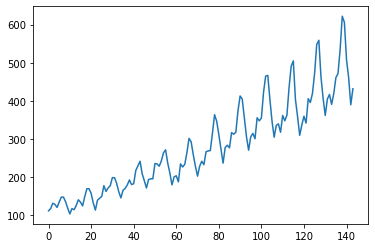

In [122]:
flights.passengers.plot();

In [123]:
flights_copy = flights.copy()

In [124]:
flights.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   year        144 non-null    int64   
 1   month       144 non-null    category
 2   passengers  144 non-null    int64   
dtypes: category(1), int64(2)
memory usage: 2.9 KB


In [125]:
flights_copy.loc[np.random.randint(1,144,20), ["passengers"]] # ilkini dolduramaz, o yüzden 1den başladık.

,passengers
35,166
42,230
8,136
89,374
117,359
16,125
77,315
82,237
41,218
143,432


In [126]:
# bulduğumuz verilere yeni bir değer atarız.

flights_copy.loc[np.random.randint(1,144,20), ["passengers"]] = np.nan

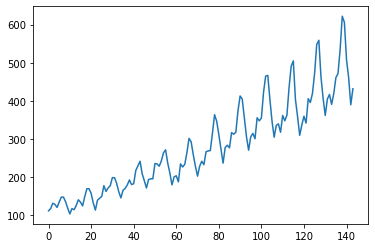

In [127]:
# gerçek datanın grafiği

flights.passengers.interpolate().plot();

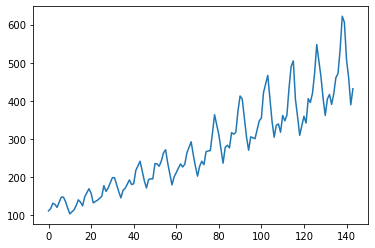

In [128]:
# son halinin grafiği

flights_copy.passengers.interpolate().plot();

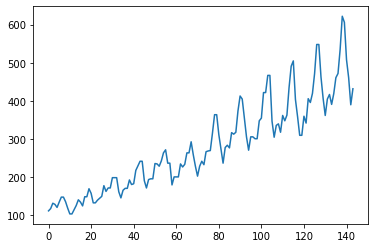

In [129]:
# ffill yönetimi ile 

flights_copy.passengers.fillna(method = "ffill").plot();

## <p style="background-color:#FDFEFE; font-family:newtimeroman; color:#9d4f8c; font-size:150%; text-align:center; border-radius:10px 10px;">The End of The Session - 07</p>

<a id="5"></a>
<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" 
style="color:blue; background-color:#dfa8e4" data-toggle="popover">Content</a>

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" 
alt="CLRSWY"></p>

## <p style="background-color:#FDFEFE; font-family:newtimeroman; color:#9d4f8c; font-size:100%; text-align:center; border-radius:10px 10px;">WAY TO REINVENT YOURSELF</p>

________